### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
for df in [tienda, tienda2, tienda3, tienda4]:
    df["Fecha de Compra"] = pd.to_datetime(
        df["Fecha de Compra"], errors="coerce", dayfirst=True
    )
    df["año_mes"] = df["Fecha de Compra"].dt.to_period("M")
    df["Año"] = df["Fecha de Compra"].dt.year


In [3]:
from numpy.random.mtrand import f
tiendas = {
    "1": tienda,
    "2": tienda2,
    "3": tienda3,
    "4": tienda4
}

opcion = input("Ingrese la tienda que desea consultar")
if opcion not in tiendas:
  print("Opción no válida")
else:
  df = tiendas[opcion]
  print(f"Resultados para la tienda {opcion}")

  filtrar = input("Desea filtrar por año y mes? (s/n)")
  if filtrar == "s":
    df["Fecha de Compra"] = pd.to_datetime(df["Fecha de Compra"])
    año_disponible = sorted(df["Fecha de Compra"].dt.year.unique())
    año_min = año_disponible[0]
    año_max = año_disponible[-1]
    print(f"Años disponibles: {año_min} - {año_max}")

    año = input("Ingrese el año")
    mes = input("Ingrese el mes")

    mes = mes.zfill(2)
    periodo = f"{año}-{mes}"
    periodo = pd.Period(periodo, freq="M")

    df_filtrado = df[df["año_mes"] == periodo]

    if df_filtrado.empty:
      print(f"No se encontraron datos para el periodo {periodo}")
    else:
      print(f"Resultados para el periodo {periodo}")

      unidades = df_filtrado["Producto"].count()
      print(f"Unidades vendidas en {periodo}: {unidades}")

      monto = df_filtrado["Precio"].sum()
      print(f"Monto total vendido en {periodo}: {monto:,.2f}")

  else:
    unidades_mes = df.groupby("año_mes")["Producto"].count()
    print("Unidades vendidas por mes:")
    print(unidades_mes)

    monto_mes = df.groupby("año_mes")["Precio"].sum()
    print("Monto total vendido por mes:")
    for periodo, monto in monto_mes.items():
      print(f"{periodo}:{monto_mes:,.2f}")

# Si existe df_filtrado úsalo, si no usa df completo
df_grafico = df_filtrado if "df_filtrado" in locals() else df


Ingrese la tienda que desea consultar2
Resultados para la tienda 2
Desea filtrar por año y mes? (s/n)s
Años disponibles: 2020 - 2023
Ingrese el año2021
Ingrese el mes3
Resultados para el periodo 2021-03
Unidades vendidas en 2021-03: 61
Monto total vendido en 2021-03: 24,646,200.00


# 2. Ventas por categoría

In [4]:
categorias = sorted(df["Categoría del Producto"].dropna().unique())

print("\nCategorías disponibles:")
for i, cat in enumerate(categorias, 1):
    print(f"{i}. {cat}")

cat_input = input("\nIngrese la categoría (tal como aparece): ")

if cat_input not in categorias:
    print("Categoría no válida")
else:
    df_cat = df[df["Categoría del Producto"] == cat_input]

    detalle = input("¿Desea filtrar detalle por año y mes? (s/n): ").lower()

    if detalle == "s":
        años = sorted(df_cat["Fecha de Compra"].dt.year.unique())
        print(f"Años disponibles: {años[0]} - {años[-1]}")

        año = int(input("Ingrese el año deseado: "))

        df_año = df_cat[df_cat["Fecha de Compra"].dt.year == año]

        if df_año.empty:
            print("No hay datos para ese año")
        else:
            ventas_mes = (
                df_año
                .groupby("año_mes")
                .agg(
                    unidades=("Producto", "count"),
                    monto=("Precio", "sum")
                )
            )

            print(f"\nVentas de '{cat_input}' en {año}:")
            print(ventas_mes)

    else:
        ventas_general = (
            df_cat
            .groupby("año_mes")
            .agg(
                unidades=("Producto", "count"),
                monto=("Precio", "sum")
            )
        )

        print(f"\nVentas históricas de '{cat_input}':")
        print(ventas_general)



Categorías disponibles:
1. Artículos para el hogar
2. Deportes y diversión
3. Electrodomésticos
4. Electrónicos
5. Instrumentos musicales
6. Juguetes
7. Libros
8. Muebles

Ingrese la categoría (tal como aparece): Libros
¿Desea filtrar detalle por año y mes? (s/n): s
Años disponibles: 2020 - 2023
Ingrese el año deseado: 2021

Ventas de 'Libros' en 2021:
         unidades     monto
año_mes                    
2021-01        13  661400.0
2021-02         8  379900.0
2021-03         3  145400.0
2021-04         3  134500.0
2021-05         6  355400.0
2021-06         4  182500.0
2021-07         1   66900.0
2021-08         3  176400.0
2021-09         2   65900.0
2021-10         5  262000.0
2021-11         7  356700.0
2021-12         5  304300.0


In [5]:
df["Año"] = df["Fecha de Compra"].dt.year
df["Q"] = df["Fecha de Compra"].dt.to_period("Q")

In [6]:
analisis_q = (
    df
    .groupby(["Categoría del Producto", "Año", "Q"])
    .agg(
        unidades=("Producto", "count"),
        monto=("Precio", "sum")
    )
    .reset_index()
)

In [7]:
df_filtros = analisis_q.copy()
filtros_usados = []


f_cat = input("¿Desea filtrar categoría? (s/n): ").lower()
if f_cat == "s":
    categorias = sorted(df_filtros["Categoría del Producto"].unique())
    print("\nCategorías disponibles:")
    for i, c in enumerate(categorias, 1):
        print(f"{i}. {c}")

    cat = input("Ingrese la categoría: ")
    if cat in categorias:
        df_filtros = df_filtros[df_filtros["Categoría del Producto"] == cat]
        filtros_usados.append(f"Categoría = {cat}")
    else:
        print("Categoría no válida")


f_año = input("¿Desea filtrar año? (s/n): ").lower()
if f_año == "s":
    años = sorted(int(a) for a in df_filtros["Año"].unique())
    print("Años disponibles:", ", ".join(map(str, años)))

    año = int(input("Ingrese el año: "))
    if año in años:
        df_filtros = df_filtros[df_filtros["Año"] == año]
        filtros_usados.append(f"Año = {año}")
    else:
        print("Año no válido")


f_q = input("¿Desea filtrar Q? (s/n): ").lower()
if f_q == "s":
    q = input("Ingrese el Quarter (Q1, Q2, Q3 o Q4): ").upper()

    if q in ["Q1", "Q2", "Q3", "Q4"]:
        df_filtros = df_filtros[
            df_filtros["Q"].astype(str).str.endswith(q)
        ]
        filtros_usados.append(f"Q = {q}")
    else:
        print("Quarter no válido")

print("\nFiltros aplicados:")
if filtros_usados:
    for f in filtros_usados:
        print(f"- {f}")
else:
    print("Ninguno")

print("\nResultados del análisis:")
print(df_filtros)


¿Desea filtrar categoría? (s/n): n
¿Desea filtrar año? (s/n): s
Años disponibles: 2020, 2021, 2022, 2023
Ingrese el año: 2021
¿Desea filtrar Q? (s/n): s
Ingrese el Quarter (Q1, Q2, Q3 o Q4): Q1

Filtros aplicados:
- Año = 2021
- Q = Q1

Resultados del análisis:
     Categoría del Producto   Año       Q  unidades       monto
4   Artículos para el hogar  2021  2021Q1        13   1197900.0
17     Deportes y diversión  2021  2021Q1        14    834300.0
30        Electrodomésticos  2021  2021Q1        23  24547300.0
43             Electrónicos  2021  2021Q1        36  32442500.0
56   Instrumentos musicales  2021  2021Q1        18   7358600.0
69                 Juguetes  2021  2021Q1        24   1491600.0
82                   Libros  2021  2021Q1        24   1186700.0
95                  Muebles  2021  2021Q1        30  12045200.0


# 3. Calificación promedio de la tienda


In [8]:
import pandas as pd

for df_tmp in [tienda, tienda2, tienda3, tienda4]:
    df_tmp["Fecha de Compra"] = pd.to_datetime(
        df_tmp["Fecha de Compra"], errors="coerce", dayfirst=True
    )
    df_tmp["año_mes"] = df_tmp["Fecha de Compra"].dt.to_period("M")
    df_tmp["Año"] = df_tmp["Fecha de Compra"].dt.year
    df_tmp["Q"] = df_tmp["Fecha de Compra"].dt.to_period("Q")


tiendas = {
    "1": tienda,
    "2": tienda2,
    "3": tienda3,
    "4": tienda4
}

opcion = input("Ingrese la tienda que desea consultar (1-4): ")

if opcion not in tiendas:
    print("Opción no válida")
else:
    df = tiendas[opcion]
    print(f"\nCalificación promedio – Tienda {opcion}")

    print("\nTipo de filtro:")
    print("1. Año-Mes")
    print("2. Quarter (Año + Q)")
    print("3. Año")

    tipo = input("Seleccione una opción (1/2/3): ")


    if tipo == "1":
        años = sorted(int(a) for a in df["Año"].dropna().unique())
        print(f"Años disponibles: {min(años)} - {max(años)}")

        año = int(input("Ingrese el año: "))
        mes = input("Ingrese el mes (1-12): ").zfill(2)

        periodo = pd.Period(f"{año}-{mes}", freq="M")
        df_filtrado = df[df["año_mes"] == periodo]

        if df_filtrado.empty:
            print("No hay datos para ese período")
        else:
            promedio = df_filtrado["Calificación"].mean()
            print(f"\nCalificación promedio en {periodo}: {promedio:.2f}")


    elif tipo == "2":
        años = sorted(int(a) for a in df["Año"].dropna().unique())
        print("Años disponibles:", ", ".join(map(str, años)))

        año = int(input("Ingrese el año: "))

        if año not in años:
            print("Año no válido")
        else:
            q = input("Ingrese el Quarter (Q1, Q2, Q3 o Q4): ").upper()

            if q not in ["Q1", "Q2", "Q3", "Q4"]:
                print("Quarter no válido")
            else:
                periodo_q = pd.Period(f"{año}{q}", freq="Q")
                df_filtrado = df[df["Q"] == periodo_q]

                if df_filtrado.empty:
                    print("No hay datos para ese quarter")
                else:
                    promedio = df_filtrado["Calificación"].mean()
                    print(f"\nCalificación promedio en {año} {q}: {promedio:.2f}")


    elif tipo == "3":
        años = sorted(int(a) for a in df["Año"].dropna().unique())
        print("Años disponibles:", ", ".join(map(str, años)))

        año = int(input("Ingrese el año: "))

        if año not in años:
            print("Año no válido")
        else:
            df_filtrado = df[df["Año"] == año]
            promedio = df_filtrado["Calificación"].mean()
            print(f"\nCalificación promedio en {año}: {promedio:.2f}")



    else:
        print("Opción no válida")






Ingrese la tienda que desea consultar (1-4): 2

Calificación promedio – Tienda 2

Tipo de filtro:
1. Año-Mes
2. Quarter (Año + Q)
3. Año
Seleccione una opción (1/2/3): 2
Años disponibles: 2020, 2021, 2022, 2023
Ingrese el año: 2021
Ingrese el Quarter (Q1, Q2, Q3 o Q4): Q1

Calificación promedio en 2021 Q1: 4.06


# 4. Productos más y menos vendidos

In [9]:
import pandas as pd


for df_tmp in [tienda, tienda2, tienda3, tienda4]:
    df_tmp["Fecha de Compra"] = pd.to_datetime(
        df_tmp["Fecha de Compra"], errors="coerce", dayfirst=True
    )
    df_tmp["año_mes"] = df_tmp["Fecha de Compra"].dt.to_period("M")
    df_tmp["Año"] = df_tmp["Fecha de Compra"].dt.year
    df_tmp["Q"] = df_tmp["Fecha de Compra"].dt.to_period("Q")



tiendas = {
    "1": tienda,
    "2": tienda2,
    "3": tienda3,
    "4": tienda4
}



filtrar_tienda = input("¿Desea filtrar por tienda? (s/n): ").lower()



if filtrar_tienda != "s":
    print("\n📊 Productos más y menos vendidos por tienda\n")

    for key, df in tiendas.items():
        if df.empty:
            print(f"Tienda {key}: sin datos")
            continue

        ventas = (
            df
            .groupby(["Producto", "Categoría del Producto"])
            .size()
            .reset_index(name="unidades")
        )

        mas_vendido = ventas.loc[ventas["unidades"].idxmax()]
        menos_vendido = ventas.loc[ventas["unidades"].idxmin()]

        print(f"\n🏬 TIENDA {key}")

        print("🟢 MÁS VENDIDO")
        print(f"Producto  : {mas_vendido['Producto']}")
        print(f"Categoría : {mas_vendido['Categoría del Producto']}")
        print(f"Unidades  : {mas_vendido['unidades']}")

        print("🔴 MENOS VENDIDO")
        print(f"Producto  : {menos_vendido['Producto']}")
        print(f"Categoría : {menos_vendido['Categoría del Producto']}")
        print(f"Unidades  : {menos_vendido['unidades']}")



else:
    print("\nTiendas disponibles:")
    for k in tiendas:
        print(f"Tienda {k}")

    opcion = input("Seleccione la tienda: ")

    if opcion not in tiendas:
        print("Tienda no válida")
    else:
        df = tiendas[opcion]
        print(f"\nAnálisis de productos – Tienda {opcion}")

        print("\nTipo de filtro temporal:")
        print("1. Año-Mes")
        print("2. Quarter (Año + Q)")
        print("3. Año")

        tipo = input("Seleccione una opción (1/2/3): ")

        # -------- AÑO - MES --------
        if tipo == "1":
            años = sorted(int(a) for a in df["Año"].dropna().unique())
            print(f"Años disponibles: {min(años)} - {max(años)}")

            año = int(input("Ingrese el año: "))
            mes = input("Ingrese el mes (1-12): ").zfill(2)

            periodo = pd.Period(f"{año}-{mes}", freq="M")
            df_filtrado = df[df["año_mes"] == periodo]
            periodo_label = str(periodo)

        # -------- QUARTER (CORREGIDO) --------
        elif tipo == "2":
            años = sorted(int(a) for a in df["Año"].dropna().unique())
            print("Años disponibles:", ", ".join(map(str, años)))

            año = int(input("Ingrese el año: "))

            if año not in años:
                print("Año no válido")
                df_filtrado = pd.DataFrame()
            else:
                q = input("Ingrese el Quarter (Q1, Q2, Q3 o Q4): ").upper()

                if q not in ["Q1", "Q2", "Q3", "Q4"]:
                    print("Quarter no válido")
                    df_filtrado = pd.DataFrame()
                else:
                    periodo_q = pd.Period(f"{año}{q}", freq="Q")
                    df_filtrado = df[df["Q"] == periodo_q]
                    periodo_label = f"{año} {q}"

        # -------- AÑO --------
        elif tipo == "3":
            años = sorted(int(a) for a in df["Año"].dropna().unique())
            print("Años disponibles:", ", ".join(map(str, años)))

            año = int(input("Ingrese el año: "))

            if año not in años:
                print("Año no válido")
                df_filtrado = pd.DataFrame()
            else:
                df_filtrado = df[df["Año"] == año]
                periodo_label = str(año)

        else:
            print("Opción no válida")
            df_filtrado = pd.DataFrame()

        # -------- RESULTADOS --------
        if df_filtrado.empty:
            print("No hay datos para el filtro seleccionado")
        else:
            ventas = (
                df_filtrado
                .groupby(["Producto", "Categoría del Producto"])
                .size()
                .reset_index(name="unidades")
            )

            mas_vendido = ventas.loc[ventas["unidades"].idxmax()]
            menos_vendido = ventas.loc[ventas["unidades"].idxmin()]

            print(f"\n📊 Resultados para el período {periodo_label}")

            print("\n🟢 PRODUCTO MÁS VENDIDO")
            print(f"Producto  : {mas_vendido['Producto']}")
            print(f"Categoría : {mas_vendido['Categoría del Producto']}")
            print(f"Unidades  : {mas_vendido['unidades']}")

            print("\n🔴 PRODUCTO MENOS VENDIDO")
            print(f"Producto  : {menos_vendido['Producto']}")
            print(f"Categoría : {menos_vendido['Categoría del Producto']}")
            print(f"Unidades  : {menos_vendido['unidades']}")


¿Desea filtrar por tienda? (s/n): s

Tiendas disponibles:
Tienda 1
Tienda 2
Tienda 3
Tienda 4
Seleccione la tienda: 2

Análisis de productos – Tienda 2

Tipo de filtro temporal:
1. Año-Mes
2. Quarter (Año + Q)
3. Año
Seleccione una opción (1/2/3): 2
Años disponibles: 2020, 2021, 2022, 2023
Ingrese el año: 2021
Ingrese el Quarter (Q1, Q2, Q3 o Q4): Q1

📊 Resultados para el período 2021 Q1

🟢 PRODUCTO MÁS VENDIDO
Producto  : Dashboards con Power BI
Categoría : Libros
Unidades  : 9

🔴 PRODUCTO MENOS VENDIDO
Producto  : Mesa de comedor
Categoría : Muebles
Unidades  : 1


# 5. Envío promedio por tienda

In [10]:
import pandas as pd



for df_tmp in [tienda, tienda2, tienda3, tienda4]:
    df_tmp["Fecha de Compra"] = pd.to_datetime(
        df_tmp["Fecha de Compra"], errors="coerce", dayfirst=True
    )
    df_tmp["año_mes"] = df_tmp["Fecha de Compra"].dt.to_period("M")
    df_tmp["Año"] = df_tmp["Fecha de Compra"].dt.year
    df_tmp["Q"] = df_tmp["Fecha de Compra"].dt.to_period("Q")



tiendas = {
    "1": tienda,
    "2": tienda2,
    "3": tienda3,
    "4": tienda4
}



filtrar_tienda = input("¿Desea filtrar por tienda? (s/n): ").lower()


if filtrar_tienda != "s":

    print("\n📦 ENVÍO TOTAL POR TIENDA Y AÑO\n")

    for key, df in tiendas.items():
        resumen = (
            df.groupby("Año")
              .agg(envio_total=("Costo de envío", "sum"))
              .reset_index()
        )

        print(f"\nTienda {key}")
        print(resumen)


else:
    print("\nTiendas disponibles:")
    for k in tiendas:
        print(f"Tienda {k}")

    opcion = input("Seleccione la tienda: ")

    if opcion not in tiendas:
        print("Tienda no válida")
    else:
        df = tiendas[opcion]
        print(f"\n📦 Análisis de ENVÍO TOTAL – Tienda {opcion}")

        print("\nTipo de filtro temporal:")
        print("1. Año-Mes")
        print("2. Quarter (Año + Q)")
        print("3. Año")

        tipo = input("Seleccione una opción (1/2/3): ")


        if tipo == "1":
            años = sorted(int(a) for a in df["Año"].dropna().unique())
            print(f"Años disponibles: {min(años)} - {max(años)}")

            año = int(input("Ingrese el año: "))
            mes = input("Ingrese el mes (1-12): ").zfill(2)

            periodo = pd.Period(f"{año}-{mes}", freq="M")
            df_filtrado = df[df["año_mes"] == periodo]
            periodo_label = str(periodo)


        elif tipo == "2":
            años = sorted(int(a) for a in df["Año"].dropna().unique())
            print("Años disponibles:", ", ".join(map(str, años)))

            año = int(input("Ingrese el año: "))

            if año not in años:
                print("Año no válido")
                df_filtrado = pd.DataFrame()
            else:
                q = input("Ingrese el Quarter (Q1, Q2, Q3 o Q4): ").upper()

                if q not in ["Q1", "Q2", "Q3", "Q4"]:
                    print("Quarter no válido")
                    df_filtrado = pd.DataFrame()
                else:
                    periodo_q = pd.Period(f"{año}{q}", freq="Q")
                    df_filtrado = df[df["Q"] == periodo_q]
                    periodo_label = f"{año} {q}"


        elif tipo == "3":
            años = sorted(int(a) for a in df["Año"].dropna().unique())
            print("Años disponibles:", ", ".join(map(str, años)))

            año = int(input("Ingrese el año: "))

            if año not in años:
                print("Año no válido")
                df_filtrado = pd.DataFrame()
            else:
                df_filtrado = df[df["Año"] == año]
                periodo_label = str(año)

        else:
            print("Opción no válida")
            df_filtrado = pd.DataFrame()


        if df_filtrado.empty:
            print("No hay datos para el filtro seleccionado")
        else:
            resumen_envio = (
                df_filtrado
                .groupby(["Producto", "Categoría del Producto"])
                .agg(envio_total=("Costo de envío", "sum"))
                .reset_index()
                .sort_values("envio_total", ascending=False)
            )

            print(f"\n📦 ENVÍO TOTAL POR PRODUCTO – {periodo_label}")
            print(resumen_envio)


            filtrar_cat = input("\n¿Desea filtrar por categoría? (s/n): ").lower()

            if filtrar_cat == "s":
                categorias = sorted(resumen_envio["Categoría del Producto"].unique())

                print("\nCategorías disponibles:")
                for i, c in enumerate(categorias, 1):
                    print(f"{i}. {c}")

                categoria = input("Ingrese la categoría: ")

                df_cat = resumen_envio[
                    resumen_envio["Categoría del Producto"] == categoria
                ]

                if df_cat.empty:
                    print("No hay datos para la categoría seleccionada")
                else:
                    print(f"\n📦 ENVÍO TOTAL – Categoría: {categoria}")
                    print(df_cat)
            else:
                print("\nConsulta finalizada")


¿Desea filtrar por tienda? (s/n): s

Tiendas disponibles:
Tienda 1
Tienda 2
Tienda 3
Tienda 4
Seleccione la tienda: 2

📦 Análisis de ENVÍO TOTAL – Tienda 2

Tipo de filtro temporal:
1. Año-Mes
2. Quarter (Año + Q)
3. Año
Seleccione una opción (1/2/3): 2
Años disponibles: 2020, 2021, 2022, 2023
Ingrese el año: 2021
Ingrese el Quarter (Q1, Q2, Q3 o Q4): Q1

📦 ENVÍO TOTAL POR PRODUCTO – 2021 Q1
                       Producto   Categoría del Producto  envio_total
46                TV LED UHD 4K             Electrónicos     498900.0
38             Secadora de ropa        Electrodomésticos     378100.0
37                 Refrigerador        Electrodomésticos     349100.0
24                    Iphone 15             Electrónicos     308200.0
47                  Tablet ABXY             Electrónicos     292100.0
27                 Lavavajillas        Electrodomésticos     267300.0
12                 Celular ABXY             Electrónicos     259200.0
43                     Smart TV             E

6. GRAFICOS

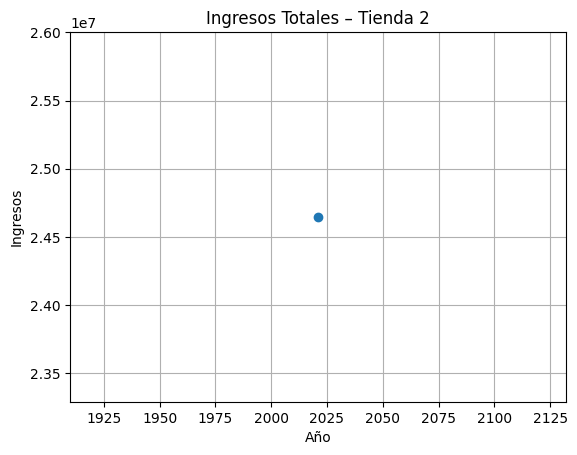

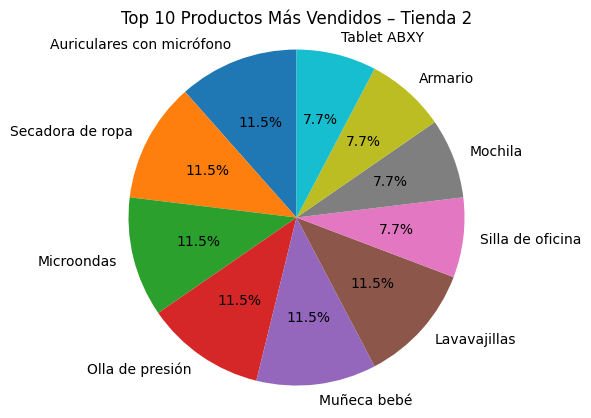

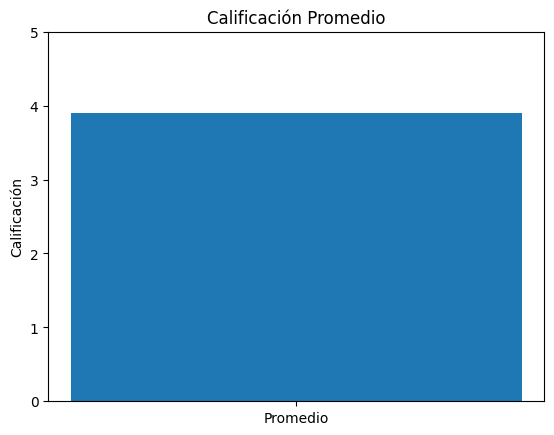

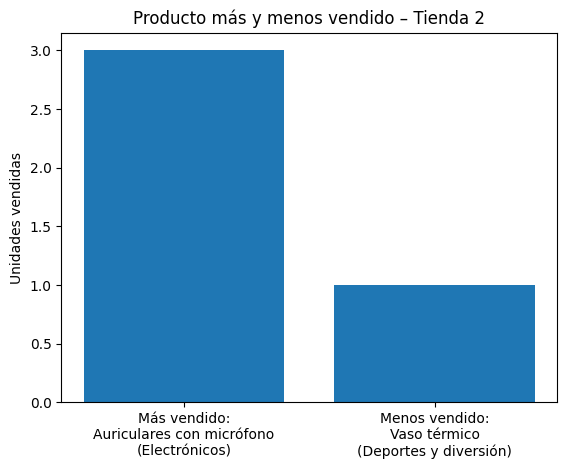

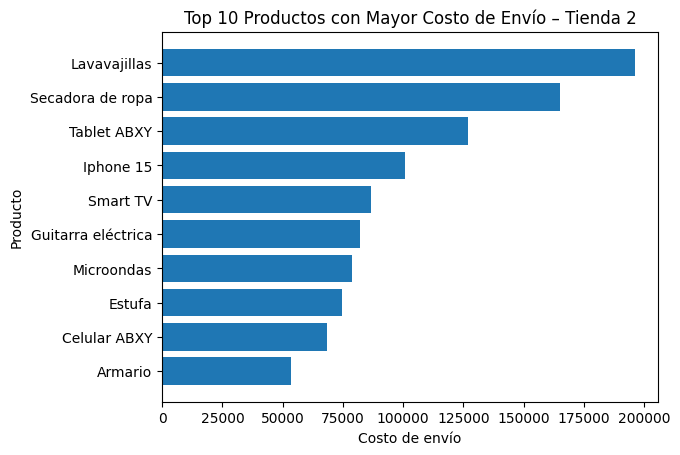

In [11]:
import matplotlib.pyplot as plt

# =====================================================
# 1️⃣ INGRESOS TOTALES
# =====================================================
resumen_ingresos = (
    df_grafico
    .groupby("Año")
    .agg(ingresos_total=("Precio", "sum"))
    .reset_index()
)

if not resumen_ingresos.empty:
    plt.figure()
    plt.plot(resumen_ingresos["Año"], resumen_ingresos["ingresos_total"], marker="o")
    plt.title(f"Ingresos Totales – Tienda {opcion}")
    plt.xlabel("Año")
    plt.ylabel("Ingresos")
    plt.grid(True)
    plt.show()

# =====================================================
# 2️⃣ VENTAS – TOP 10 PRODUCTOS (PIE CHART)
# =====================================================
ventas = (
    df_grafico
    .groupby(["Producto", "Categoría del Producto"])
    .size()
    .reset_index(name="unidades")
    .sort_values("unidades", ascending=False)
)

top_ventas = ventas.head(10)

if not top_ventas.empty:
    plt.figure()
    plt.pie(
        top_ventas["unidades"],
        labels=top_ventas["Producto"],
        autopct="%1.1f%%",
        startangle=90
    )
    plt.title(f"Top 10 Productos Más Vendidos – Tienda {opcion}")
    plt.axis("equal")  # Hace el pie circular
    plt.show()

# =====================================================
# 3️⃣ CALIFICACIÓN PROMEDIO
# =====================================================
if "Calificación" in df_grafico.columns:
    promedio = df_grafico["Calificación"].mean()

    plt.figure()
    plt.bar(["Promedio"], [promedio])
    plt.title("Calificación Promedio")
    plt.ylabel("Calificación")
    plt.ylim(0, 5)
    plt.show()

# =====================================================
# 4️⃣ PRODUCTO MÁS Y MENOS VENDIDO
# =====================================================
if not ventas.empty:
    mas_vendido = ventas.iloc[0]
    menos_vendido = ventas.iloc[-1]

    labels = [
        f"Más vendido:\n{mas_vendido['Producto']}\n({mas_vendido['Categoría del Producto']})",
        f"Menos vendido:\n{menos_vendido['Producto']}\n({menos_vendido['Categoría del Producto']})"
    ]

    valores = [mas_vendido["unidades"], menos_vendido["unidades"]]

    plt.figure()
    plt.bar(labels, valores)
    plt.title(f"Producto más y menos vendido – Tienda {opcion}")
    plt.ylabel("Unidades vendidas")
    plt.show()

# =====================================================
# 5️⃣ COSTO DE ENVÍO – TOP 10 PRODUCTOS
# =====================================================
if "Costo de envío" in df_grafico.columns:
    resumen_envio = (
        df_grafico
        .groupby(["Producto", "Categoría del Producto"])
        .agg(envio_total=("Costo de envío", "sum"))
        .reset_index()
        .sort_values("envio_total", ascending=False)
    )

    if not resumen_envio.empty:
        plt.figure()
        plt.barh(resumen_envio.head(10)["Producto"], resumen_envio.head(10)["envio_total"])
        plt.title(f"Top 10 Productos con Mayor Costo de Envío – Tienda {opcion}")
        plt.xlabel("Costo de envío")
        plt.ylabel("Producto")
        plt.gca().invert_yaxis()
        plt.show()




Analisis final:

Análisis de la Tienda 2 – 2021 Q1

La Tienda 2 tuvo un buen desempeño durante el primer cuartil de 2021. En marzo se vendieron 61 unidades, alcanzando una facturación de 24,646,200, lo que muestra una capacidad fuerte para generar ingresos en poco tiempo.

Por categorías, Electrónicos y Electrodomésticos destacan claramente. Aunque no siempre venden la mayor cantidad de unidades, concentran la mayor parte del dinero generado, lo que indica que la tienda trabaja con productos de alto valor. Muebles también tiene un buen peso, mientras que categorías como Libros y Juguetes aportan volumen, pero no tanto ingreso.

La calificación promedio de 4.06 indica que los clientes, en general, están satisfechos con la experiencia de compra, lo cual es un punto positivo para mantener y atraer más ventas.

El producto más vendido fue “Dashboards con Power BI” (Libros), lo que sugiere que los productos educativos y tecnológicos tienen buena demanda. En contraste, “Mesa de comedor” fue el menos vendido, probablemente por su precio o por los costos asociados al envío.

En cuanto al envío, los mayores costos se concentran en productos grandes o tecnológicos, como televisores y electrodomésticos. Aun así, estos productos también son los que más facturan, por lo que el costo logístico no parece afectar de forma crítica el negocio.

En general, la Tienda 2 es una buena opción para vender, sobre todo si se priorizan productos tecnológicos y de alto valor, cuidando los costos de envío para mantener la rentabilidad.